# Visualization of final Results

The notebook reproduces the experiments on the purely simulated data in the paper [__A causal view on compositional data__](https://arxiv.org/abs/2106.11234) by E. Ailer, C. L. Müller and N. Kilbertus.


# Loading of libraries

In [223]:
# STANDARD LIBRARIES
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "../src"))
import jax
import jax.numpy as np
import numpy as onp
import skbio.stats.composition as cmp
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import statsmodels.api as sm
from datetime import datetime
from types import SimpleNamespace
import random


# methods function file
# plotting functionalities
from plot_fct import update_layout, update_layout_px, colours, plot_ilr_X_vs_Y, plot_mse_results, plot_beta_results, plot_diversity_methods
from visualization import plot_results, write_result_table

In [224]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get data

In [225]:
input_path = "/Users/elisabeth.ailer/Projects/P1_Microbiom/Output/Rerun_jax/"
fig_path_root = "/Users/elisabeth.ailer/Projects/P1_Microbiom/Output/Rerun_jax/Figures/"

In [340]:
type = "nonlinear"
p = 3
q = 2
n = 1000

In [341]:
num_runs = 20 if type=="negbinom" else 50
type_ext = "highdim_linear" if (p > 3) & (type=="linear") else type
identifier = str(type) + "_n" + str(n) + "_p" + str(p) + "_q" + str(q)
fig_path = os.path.join(fig_path_root, identifier)
path = os.path.join(input_path, "paramfile_" + str(type) + "_n" + str(n) + "_p" + str(p) + "_q" + str(q))
file = "res_numruns" + str(num_runs) + ".pickle"
data_file = "data_res_" + str(type_ext) + "_n" + str(n) + "_p" + str(p) + "_k" + str(q) + "_" + str(random.randint(0, num_runs)) + ".pickle"
if type=="linear_weak":
    data_file = "data_res_" + str(type_ext) + "_n" + str(n) + "_p" + str(p) + "_k" + str(q) + "_" + str(10) + ".pickle"
    
res_path = os.path.join(path, file)
data_path = os.path.join(path, data_file)

In [342]:
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

In [343]:
with open(res_path, "rb") as f:
    results = pickle.load(f)
    df_mse = results["df_mse"]
    df_beta = results["df_beta"]
    betaT = results["betaT"]
    p = len(df_beta.iloc[0,1])

f.close()
        

    
with open(data_path, "rb") as f:
    data = pickle.load(f)
    for key,val in data.items():
        exec(key + '=val')
    f.close()

if type=="negbinom":
    V = cmp._gram_schmidt_basis(p)
    betaT = V@betaT
    
X_sim_ilr = cmp.ilr(X_sim)
X_star_ilr = cmp.ilr(X_star)
n, num_inst = Z_sim.shape

# Visualization of one datasample

## Barplot

In [344]:
X_plot

Array([[0.2829911 , 0.3504668 , 0.3665421 , 0.        ],
       [0.12942895, 0.3664562 , 0.5041148 , 0.        ],
       [0.15951832, 0.38679656, 0.45368513, 0.        ],
       ...,
       [0.13233157, 0.36658642, 0.50108206, 0.        ],
       [0.29487312, 0.35820836, 0.34691852, 0.        ],
       [0.15058374, 0.34093833, 0.5084779 , 0.        ]], dtype=float32)

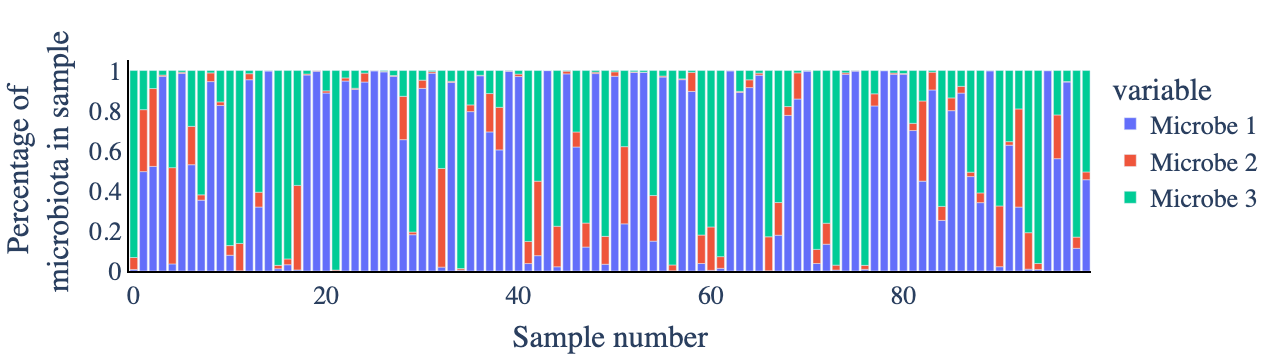

In [345]:
cut_off = 7
X_plot = np.hstack([X_sim[:, :cut_off], X_sim[:, cut_off:].sum(axis=1).T[..., np.newaxis]])
fig = px.bar(pd.DataFrame(X_plot[:100, :], columns=["Microbe "+str(i+1) for i in range(X_plot.shape[1]-1)] + ["Other"]))
if p < 4:
    fig = px.bar(pd.DataFrame(X_plot[:100, :-1], columns=["Microbe "+str(i+1) for i in range(X_plot.shape[1]-1)]))
    
fig = update_layout_px(fig)
fig.update_xaxes(title="Sample number")
fig.update_yaxes(title="Percentage of <br> microbiota in sample")
fig.write_image(os.path.join(fig_path,identifier+"_Barplot.pdf" ))
fig.show()

## F- statistics

In [346]:
ZZ_sim = onp.array(sm.add_constant(Z_sim))
# Compute F-Statistics 
ZZ_sim = onp.array(sm.add_constant(Z_sim))
alphahat = np.linalg.inv(ZZ_sim.T@ZZ_sim)@ZZ_sim.T@X_sim_ilr
MSM = np.sum(((ZZ_sim@alphahat - np.mean(X_sim_ilr, axis=0))**2), axis=0)/(num_inst)
MSE = np.sum(((ZZ_sim@alphahat - X_sim_ilr)**2), axis=0)/(n-num_inst)
F = MSM / MSE
F

Array([178.38445, 102.50713], dtype=float32)

## ilr vs. Y Plot

In [350]:
X_sim_ilr

array([[-1.45942593, -3.08512545],
       [ 0.33445501,  0.56814623],
       [ 0.20835733,  1.31674099],
       ...,
       [-1.04873276, -1.07026565],
       [ 1.80160475,  1.39029646],
       [ 1.95609641, -2.0257802 ]])

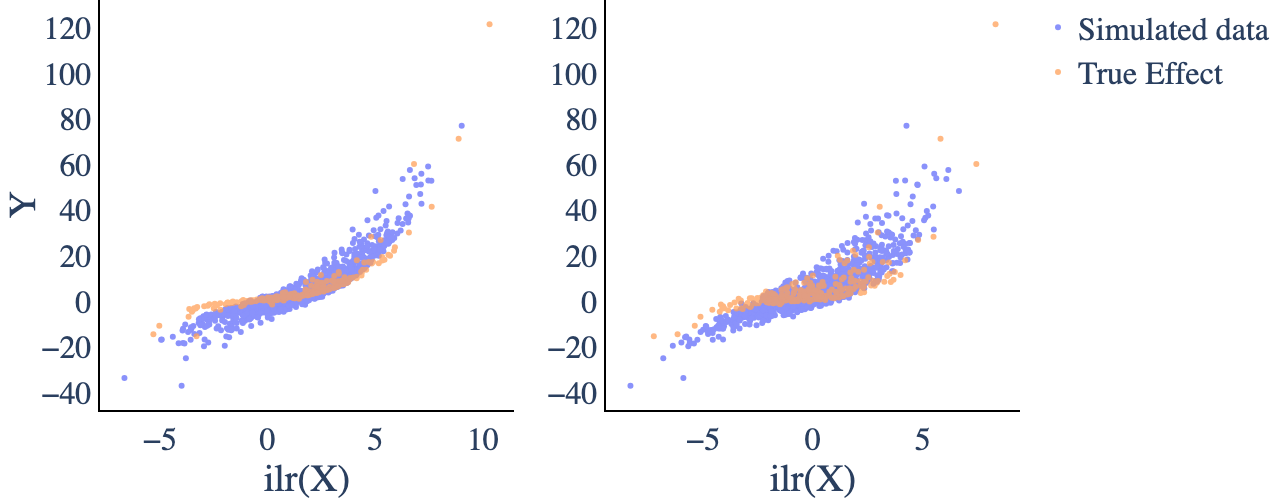

In [347]:
fig = plot_ilr_X_vs_Y(X_sim_ilr, X_star_ilr, Y_sim, Y_star)


if p > 3:
    fig.update_layout(xaxis3=dict(showline=True, linewidth=2, linecolor="black"))
    fig.update_layout(yaxis3=dict(showline=True, linewidth=2, linecolor="black"))
    fig.update_layout(xaxis4=dict(showline=True, linewidth=2, linecolor="black"))
    fig.update_layout(yaxis4=dict(showline=True, linewidth=2, linecolor="black"))
    fig.update_layout(xaxis5=dict(showline=True, linewidth=2, linecolor="black"))
    fig.update_layout(yaxis5=dict(showline=True, linewidth=2, linecolor="black"))
    fig.update_layout(width=2000, height=500)


fig.update_layout(width=2000, height=500)
fig.write_image(os.path.join(fig_path,identifier+"_ilrXY.pdf" ))

fig.show()

## Ternary Plot

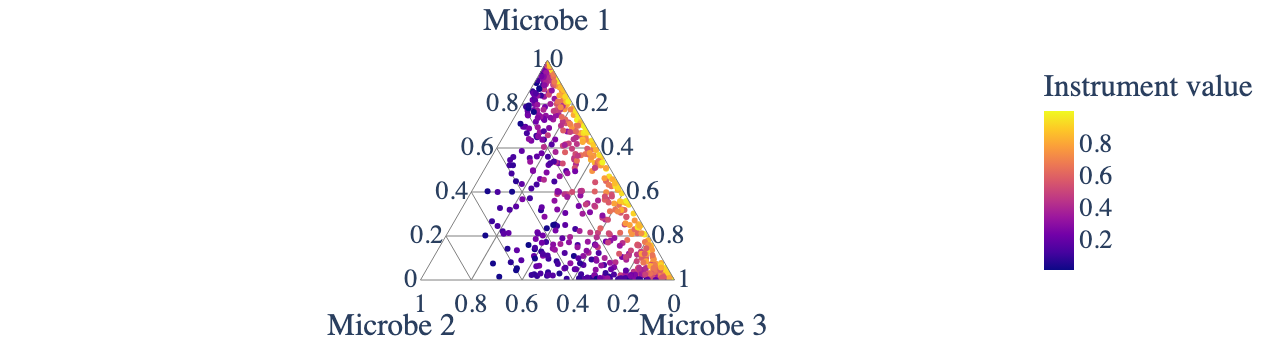

In [348]:
if p == 3:
    df = pd.DataFrame(X_sim, columns=["Microbe 1", "Microbe 2", "Microbe 3"])
    fig = px.scatter_ternary(df, a='Microbe 1', 
                             b='Microbe 2', 
                             c='Microbe 3',
                             color=Z_sim[:, 0].squeeze(),
                            labels={"color": "Instrument value"})

    fig = update_layout_px(fig)
    #ig.update_layout(gridcolor="gray")
    fig.write_image(os.path.join(fig_path,identifier+"_Ternary0.pdf" ))
    fig.show()

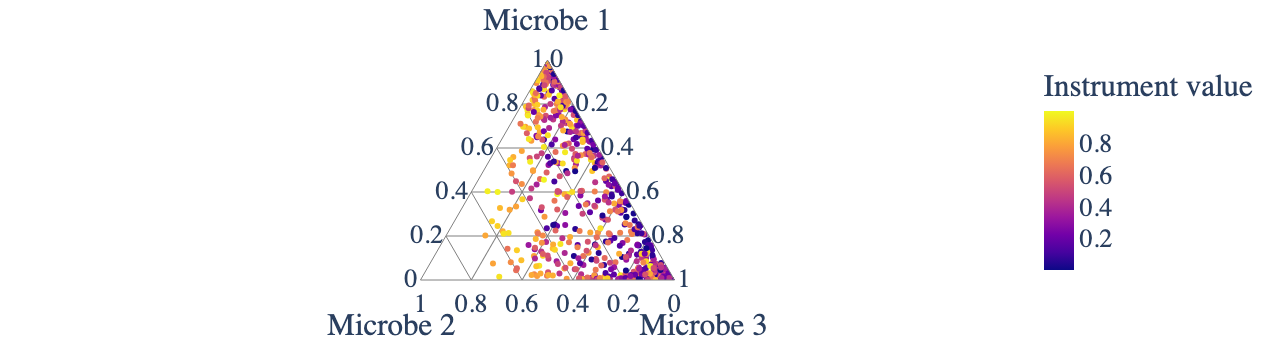

In [349]:
if p == 3:
    df = pd.DataFrame(X_sim, columns=["Microbe 1", "Microbe 2", "Microbe 3"])
    fig = px.scatter_ternary(df, a='Microbe 1', 
                             b='Microbe 2', 
                             c='Microbe 3',
                             color=Z_sim[:, 1].squeeze(),
                            labels={"color": "Instrument value"})

    fig = update_layout_px(fig)
    #ig.update_layout(gridcolor="gray")
    fig.write_image(os.path.join(fig_path,identifier+"_Ternary1.pdf" ))
    fig.show()

# Generation of final plots

In [304]:
df_mse.Method.unique()

array(['Kernel+Kernel', 'ILR+ILR', 'ALR+LC', 'ILR+LC', 'KIV',
       'ONLY Second LC', 'NoComp'], dtype=object)

In [305]:
res = write_result_table(df_beta, df_mse, betaT)
pd.merge(pd.merge(pd.merge(res["df_prediction_error"], res["df_estimation_error"], on="Method"), res["df_support_nonzeroval"], on="Method"), res["df_support_zeroval"], on="Method")


MSE         Estimation Error         False Zero Values  \
                  mean std_err             mean std_err              mean   
Method                                                                      
ALR+LC            6.48     nan             0.37     nan               0.0   
ILR+ILR           6.48     nan             0.37     nan               0.0   
ILR+LC            6.48     nan             0.37     nan               0.0   
KIV              62.48     nan              nan     nan               0.0   
Kernel+Kernel     6.45     nan              nan     nan               0.0   
NoComp          2489.0     nan        409107.03     nan               0.0   
ONLY Second LC  221.42     nan           134.25     nan               0.0   

                       False NON Zero Values          
               std_err                  mean std_err  
Method                                                
ALR+LC             nan                   0.0     nan  
ILR+ILR            nan                   0.0     nan  
ILR+LC             nan                   0.0     nan  
KIV                nan                   0.0     nan  
Kernel+Kernel      nan                   0.0     nan  
NoComp             nan                   0.0     nan  
ONLY Second LC     nan                   0.0     nan

In [306]:
df_beta.Method.unique()

array(['NoComp', 'ONLY Second LC', 'ILR+LC', 'ILR+ILR', 'ALR+LC', 'KIV',
       'Kernel+Kernel'], dtype=object)

In [307]:
filter_list = df_beta.Method.unique()
#filter_list = ["ILR+LC", "DIR+LC", "ONLY Second LC", "KIV"]
#filter_list = ["ILR+LC", "DIR+LC", "ONLY Second LC", "KIV", "M_KIV", "ONLY Second KIV"]
filter_list = ["ILR+LC", "Only LC", "KIV(ILR)"]

df_beta['Method'] = df_beta['Method'].replace('ONLY Second LC', 'Only LC')
df_mse['Method'] = df_mse['Method'].replace('ONLY Second LC', 'Only LC')
df_beta['Method'] = df_beta['Method'].replace('Kernel+Kernel', "KIV(ILR)")
df_mse['Method'] = df_mse['Method'].replace('Kernel+Kernel', "KIV(ILR)")


<script>
MathJax = {
  tex: {
    inlineMath: [['$', '$'], ['\\(', '\\)']]
  },
  svg: {
    fontCache: 'global'
  }
};
</script>
<script type="text/javascript" id="MathJax-script" async
  src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-svg.js">
</script>


In [308]:
df_beta.columns

Index(['Method', 'Beta', 'Zero Recovery', 'Estimation Error',
       'False NON Zero Values', 'False Zero Values'],
      dtype='object')

/Users/elisabeth.ailer/Projects/P1_Microbiom/Code/notebooks/../src/plot_fct.py:232: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/elisabeth.ailer/Projects/P1_Microbiom/Code/notebooks/../src/plot_fct.py:234: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



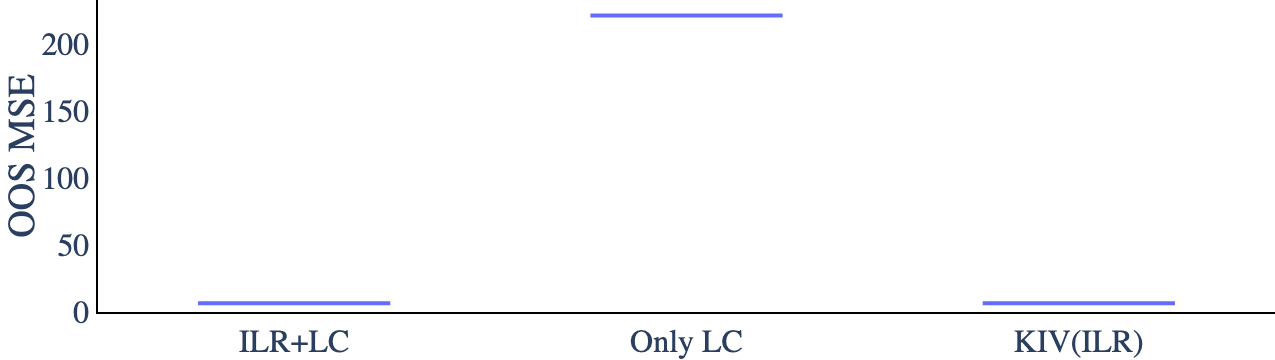

/Users/elisabeth.ailer/Projects/P1_Microbiom/Code/notebooks/../src/plot_fct.py:300: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/elisabeth.ailer/Projects/P1_Microbiom/Code/notebooks/../src/plot_fct.py:302: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



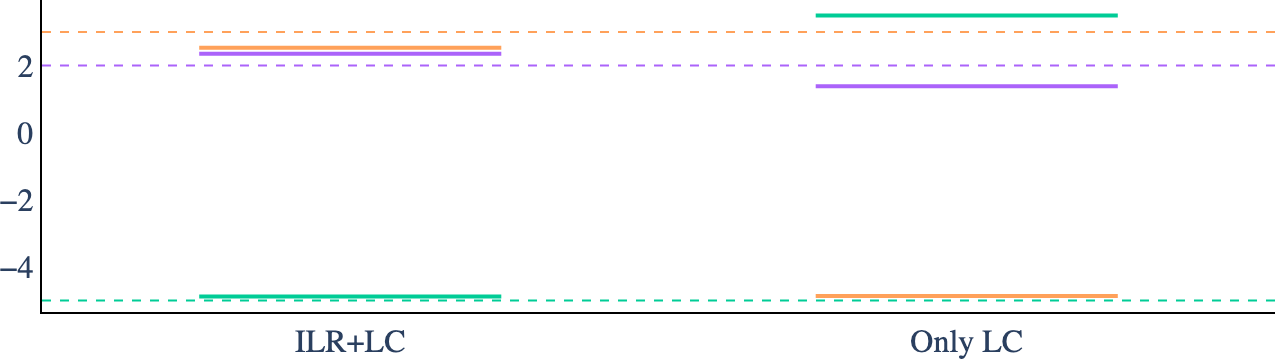

/Users/elisabeth.ailer/Projects/P1_Microbiom/Code/notebooks/../src/plot_fct.py:300: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/elisabeth.ailer/Projects/P1_Microbiom/Code/notebooks/../src/plot_fct.py:302: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



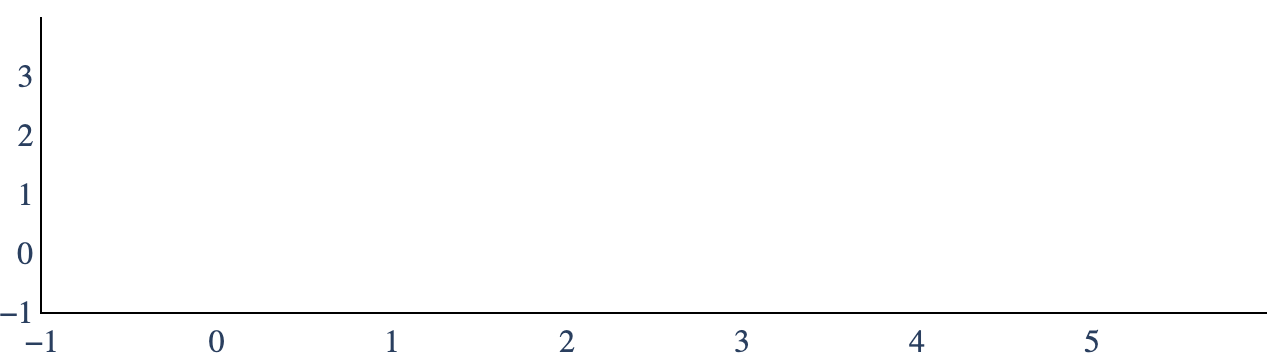

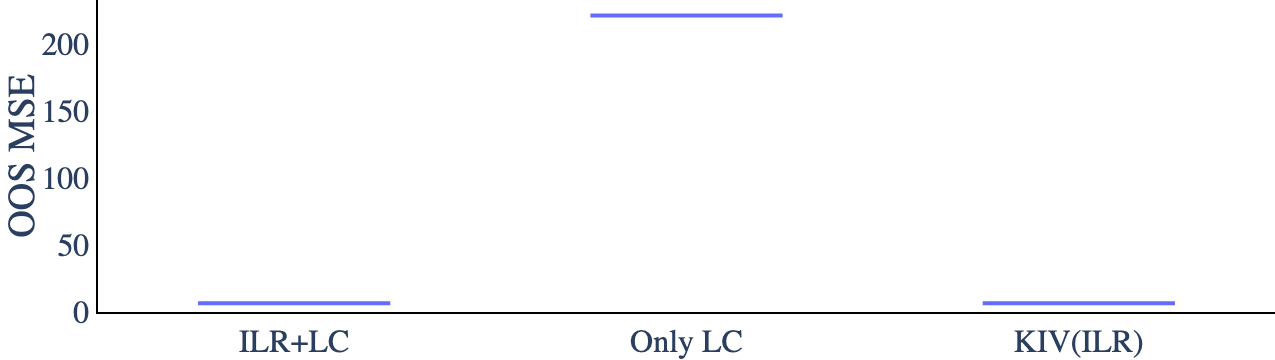

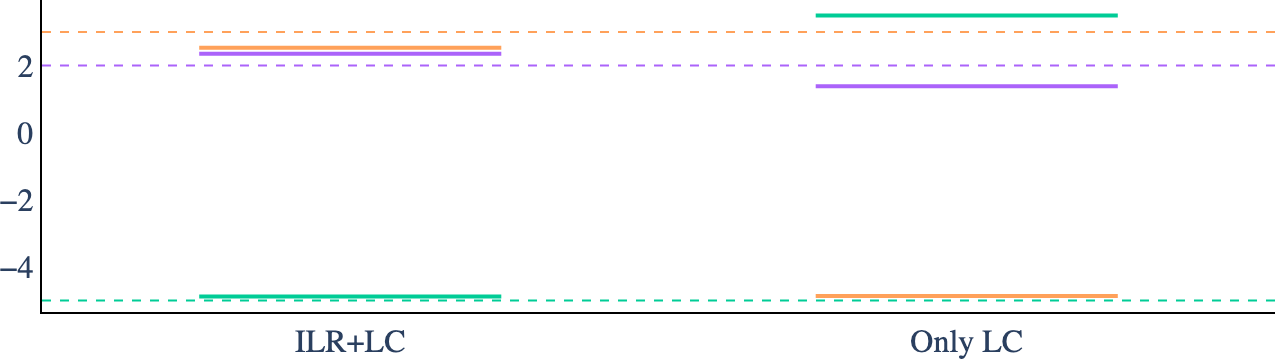

In [309]:
fig_mse, fig_beta, fig_beta_0 = plot_results(df_beta, df_mse, betaT, filter_list, sort_to_filter=True)

#fig_mse.update_yaxes(range=(0, 50))
fig_mse.show()
fig_mse.write_image(os.path.join(fig_path, identifier+ "_MSE.pdf"))

#fig_beta.update_yaxes(range=(-25, 25))
fig_beta.show()
fig_beta.write_image(os.path.join(fig_path, identifier+"_Beta.pdf"))
fig_beta_0.write_image(os.path.join(fig_path, identifier+"_Beta0.pdf"))

with open(os.path.join(fig_path, identifier+"_res.pickle"), "wb") as f:
    pickle.dump(res, f, protocol=pickle.HIGHEST_PROTOCOL)
    f.close()